# Regressão Linear Simples

## Objetivo

Construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston.

## Dataset 

Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

## Informações do Dataset

Características do Dataset: Multivariado <br>
Número de instâncias: 506 <br>
Número de atributos: 14 <br>
Valores faltando: Não <br>
Características dos atributos: categórico, inteiro e real <br>
Origem: StatLib library que é mantido pela Universidade de Carnegie Mellon

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town                                        (taxa de criminalidade per capita na cidade )
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. )
3. INDUS: proportion of non-retail business acres per town (proporção de acres de negócios não varejistas por cidade )
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário))
5. NOX: nitric oxides concentration (parts per 10 million) (concentração de óxidos nítricos (partes por 10 milhões) )
6. RM: average number of rooms per dwelling (número médio de quartos por habitação)
7. AGE: proportion of owner-occupied units built prior to 1940 (proporção de unidades ocupadas pelo proprietário construídas antes de 1940 )
8. DIS: weighted distances to five Boston employment centres (distâncias ponderadas até cinco centros de empregos de Boston )
9. RAD: index of accessibility to radial highways (índice de acessibilidade a rodovias radiais )
10. TAX: full-value property-tax rate per 10,000 (valor total da taxa de imposto sobre a propriedade por 10.000 )
11. PTRATIO: pupil-teacher ratio by town (proporção aluno-professor por cidade )
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 (Bk - 0,63) ^ 2, onde Bk é a proporção de negros por cidade )
13. LSTAT: % lower status of the population (% de status inferior da população )
14. TARGET: Median value of owner-occupied homes in 1000 dolarés (Valor médio das casas ocupadas pelo proprietário em US $ 1.000 )

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## Análise Exploratória

In [2]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [3]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [5]:
valor_medio_esperado_na_previsao

22.532806324110698

In [6]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


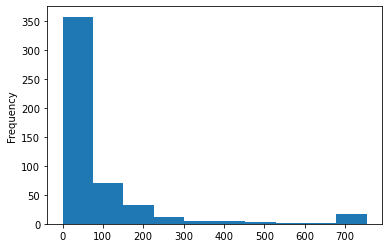

In [7]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores próximos à média.
hist_plot = squared_errors.plot(kind='hist')

Para Regressão Linear Simples usaremos como variável explanatória a variável RM que representa o número médio de quartos nas casas.

In [8]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [9]:
# Imprimindo o desvio padrão via fórmula e via NumPy da variável RM
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['RM']), np.std(dataset['RM'])))

Resultado da Função: 0.70192 Resultado do Numpy: 0.70192


In [10]:
# Funções para calcular a variância da variável RM e a correlação com a variável target
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [11]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['RM'], dataset['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.69536
Correlação a partir da função pearsonr do SciPy: 0.69536


In [12]:
# Definindo o range dos valores de x e y
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

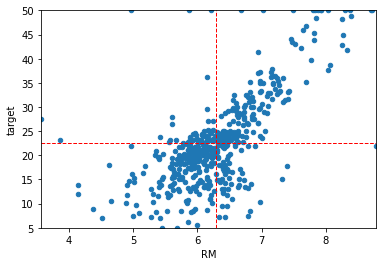

In [13]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
from sklearn import linear_model

In [15]:
# Cria o objeto
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [16]:
# Define os valores de x e y
num_observ = len(dataset)
X = dataset['RM'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dataset['target'].values # y pode ser um vetor

In [17]:
type(X)

numpy.ndarray

In [18]:
# Número de dimensões de X (matriz)
np.ndim(X)

2

In [19]:
print(X)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [20]:
type(y)

numpy.ndarray

In [21]:
# Número de dimensões de y (vetor)
np.ndim(y)

1

In [22]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [23]:
# Treinamento do modelo - fit()
modelo.fit(X,y)

LinearRegression()

In [33]:
# Imprime as previsões
print (modelo.predict(X))

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [31]:
# Fazendo previsões com o modelo treinado
RM = 5
# Xp = np.array(RM)
Xp = np.array(RM).reshape(-1, 1)
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


In [26]:
valores_previstos = modelo.predict(X)

### Gerando um ScatterPlot com a Linha de Regressão

In [32]:
# Range de valores para x e y
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

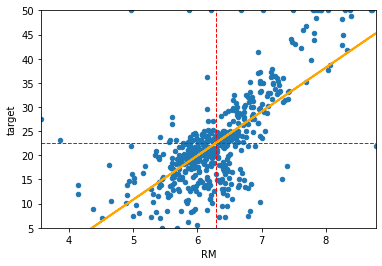

In [33]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [39]:
# Gerando os resíduos
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

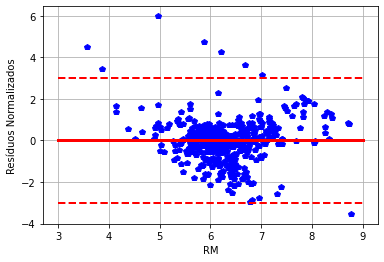

In [40]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(dataset['RM'], residuos_normalizados,'bp')
plt.xlabel('RM') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

## Função de Custo de um Modelo de Regressão Linear

O objetivo da regressão linear é buscar a equação de uma linha de regressão que minimize a soma dos erros ao quadrado, da diferença entre o valor observado de y e o valor previsto.

Existem alguns métodos para minimização da Cost Function tais como: Pseudo-inversão, Fatorização e Gradient Descent.

## Minimizando a Cost Function 

Minimizando a Cost Function com Pseudo-Inversão

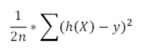

In [41]:
from IPython.display import Image
Image('imagens/formula-cost-function.png')

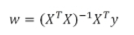

In [42]:
from IPython.display import Image
Image('imagens/formula-pseudo.png')

In [43]:
# Definindo x e y
num_observ = len(dataset)
X  = dataset['RM'].values.reshape((num_observ, 1)) # X deve ser uma matriz
Xb = np.column_stack((X, np.ones(num_observ)))
y  = dataset['target'].values # y pode ser um vetor

In [44]:
# Funções para matriz inversa e equações normais
def matriz_inversa(X, y, pseudo = False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

In [45]:
# Imprime os valores
print (matriz_inversa(Xb, y))
print (matriz_inversa(Xb, y, pseudo = True))
print (normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


## Aplicando o Gradiente Descendente

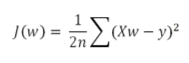

In [46]:
from IPython.display import Image
Image('imagens/formula-gradient-descent1.png')

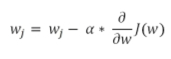

In [47]:
# Alfa é chamado de taxa de aprendizagem
from IPython.display import Image
Image('imagens/formula-gradient-descent2.png')

In [48]:
# Definindo x e y
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) 
X = np.column_stack((X,np.ones(observations))) 
y = dataset['target'].values 

In [50]:
import random

# Valores randômicos para os coeficientes iniciais
def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

# Cálculo da hipótese (valor aproximado de y)
def hypothesis(X,w):
    return np.dot(X,w)

# Cálculo da função de perda (loss)
def loss(X,w,y):
    return hypothesis(X,w) - y

# Cálculo do erro
def squared_loss(X,w,y):
    return loss(X,w,y)**2

# Cálculo do gradiente
def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

# Atualização do valor dos coeficientes
def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

# Otimização do modelo
def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

In [51]:
# Definindo o valor de alfa
# Alfa é chamado de taxa de aprendizagem
alpha = 0.048

# Otimizando a Cost Function
w, path = optimize(X, y, alpha, eta = 10**-12, iterations = 25000)

In [52]:
# Imprimindo o resultado
print ("Valor Final dos Coeficientes: %s" % w)

Valor Final dos Coeficientes: [9.10210328268812, -34.67058452765726]


In [53]:
# Imprimindo o resultado
print ("Percorrendo o Caminho do Gradiente em que o erro ao quadrado era:\n\n %s" % path)

Percorrendo o Caminho do Gradiente em que o erro ao quadrado era:

 [145513.4599396258, 23902.197452183933, 22496.48686160369, 22164.51569520018, 22086.117726185945, 22067.60334250574, 22063.23100470965, 22062.198437915456, 22061.954588003995, 22061.897000659857, 22061.88340089193, 22061.880189184732, 22061.879430711262, 22061.87925159095, 22061.879209290084, 22061.87919930035, 22061.87919694119, 22061.87919638405, 22061.879196252477, 22061.879196221405, 22061.879196219998]
